In [1]:
###TRABAJO VOLUNTARIO###

In [2]:
#carga de datos

import csv

def lee_hospital(fichero):
    registros=[]
    with open(fichero,'r', encoding='utf-8') as f:
        lector = csv.reader(f, delimiter=';')
        next(lector)
        registros = [(sexo.upper(), Hospital, estadiopostqx, int(ggextirpados), int(ggafectos), recaida.upper()) 
                     for sexo, Hospital, estadiopostqx, ggextirpados, ggafectos, recaida in lector]
    return registros

 

In [3]:
registros = lee_hospital('C:\\Users\\carlo\\Downloads\\trabajoFP\\datos_pacientes.csv')

print(len(registros), registros[:2])

413 [('HOMBRE', 'Carlos haya', 'IIc', 10, 0, 'SI'), ('HOMBRE', 'Carlos haya', 'IIa', 9, 0, 'NO')]


In [4]:
#Cuantos pacientes han recaido?

In [5]:
def pacientes_recaida1(registros):
    return sum(1 for paciente in registros if paciente[5] == 'SI')

resultado1 = pacientes_recaida1(registros)
print('Número de pacientes en recaída: {}'.format(resultado1))

Número de pacientes en recaída: 121


In [6]:
#Muestra una lista ordena alfabeticamente de los hospitales nombrados en el fichero 

In [7]:
def lista_hospitales(fichero):
    hospitales_unicos = sorted(set(hospital[1] for hospital in lee_hospital(fichero)))
    
    print('Hospitales únicos en el fichero:')
    for hospital in hospitales_unicos:
        print(hospital)
        
fichero = 'C:\\Users\\carlo\\Downloads\\trabajoFP\\datos_pacientes.csv'
lista_hospitales(fichero)

Hospitales únicos en el fichero:
Antequera
Axarquia
Carlos haya
Clinico
Hospital Costa del Sol
Ronda
Velez
desconocido


In [8]:
#Obtener una lista ordena alfabeticamente de los distintos tipos de estadios que hay en el csv
#Donde I: etapa inical, IIIa,IIIb,IIIc: tercer nivel de los distintos subgrupos a b y c, IV etapa avanzada y 
#RC respuesta complta al tratamiento

In [9]:
def calcula_tipos(registros):
    return sorted(list({r[2] for r in registros}))

fichero = 'C:\\Users\\carlo\\Downloads\\trabajoFP\\datos_pacientes.csv'
registros = lee_hospital(fichero)
resultado = calcula_tipos(registros)
print(resultado)

['0', 'I', 'IIIa', 'IIIb', 'IIIc', 'IIa', 'IIb', 'IIc', 'IVa', 'IVb', 'RC']


In [10]:
#La función contar_pacientes_por_hospital indica la cantidad de pacientes para cada hospital.

In [11]:
def contar_pacientes_por_hospital(registros):
    conteo_por_hospital = {}

    for registro in registros:
        hospital = registro[1]
        if hospital not in conteo_por_hospital:
            conteo_por_hospital[hospital] = 1
        else:
            conteo_por_hospital[hospital] += 1

    for hospital, cantidad in conteo_por_hospital.items():
        print(hospital + ": " + str(cantidad) + " pacientes")


In [12]:
registros = lee_hospital('C:\\Users\\carlo\\Downloads\\trabajoFP\\datos_pacientes.csv')
contar_pacientes_por_hospital(registros)

Carlos haya: 214 pacientes
Antequera: 51 pacientes
Velez: 12 pacientes
Clinico: 18 pacientes
Hospital Costa del Sol: 87 pacientes
Ronda: 3 pacientes
Axarquia: 24 pacientes
desconocido: 4 pacientes


In [13]:
#Calcula el promedio de pacientes afectados por un tipo de estadio en cada hospital.


In [14]:
def promedio_afectados_por_hospital(registros, estadio):

    # Filtrar pacientes por el tipo de estadio
    pacientes_estadio = [paciente for paciente in registros if paciente[2] == estadio]

    # Calcular promedio por hospital
    promedios = {}
    for hospital in set(paciente[1] for paciente in pacientes_estadio):
        pacientes_hospital = [paciente for paciente in pacientes_estadio if paciente[1] == hospital]
        total_pacientes = sum(paciente[4] for paciente in pacientes_hospital)
        promedio = total_pacientes / len(pacientes_hospital)
        promedios[hospital] = promedio

    return promedios

# En el estadio IIIa
promedios_por_hospital = promedio_afectados_por_hospital(registros, 'IIIa')
print("Promedio de pacientes afectados por hospital en el estadio IIIa:")
for hospital, promedio in promedios_por_hospital.items():
    print("Hospital: " + hospital + ", Promedio: " + str(promedio))


Promedio de pacientes afectados por hospital en el estadio IIIa:
Hospital: Ronda, Promedio: 2.0
Hospital: Clinico, Promedio: 1.0
Hospital: Antequera, Promedio: 2.0
Hospital: Carlos haya, Promedio: 1.4285714285714286
Hospital: Hospital Costa del Sol, Promedio: 1.5


In [15]:
# La función toma una lista de tuplas de registros y calcula qué proporción de estadio post quirúrgicos son IIIa:

def proporcion_estadiopostqx(registros):
    total=len([r for r in registros])
    iiia=len([r for r in registros if r[2]=='IIIa'])
    
    return iiia/total



In [16]:
proporcion=proporcion_estadiopostqx(registros)
print(proporcion)

0.06053268765133172


In [25]:
#Toma como entrada una lista de registros, y produce como salida un diccionario cuyas claves son
#los distintos valores del atributo hospital y los valores son el número de personas registradas por cada hospital.

In [40]:
from collections import defaultdict

def contar_personas_por_hospital(registros):
    personas_por_hospital = defaultdict(int)
    
    for registro in registros:
        personas_por_hospital[registro[1]] += 1

    return dict(personas_por_hospital)
      

In [41]:
registros = lee_hospital('C:\\Users\\carlo\\Downloads\\trabajoFP\\datos_pacientes.csv')
print(sorted(contar_personas_por_hospital(registros).items(), reverse=True, key=lambda x: x[1])[:9])

[('Carlos haya', 214), ('Hospital Costa del Sol', 87), ('Antequera', 51), ('Axarquia', 24), ('Clinico', 18), ('Velez', 12), ('desconocido', 4), ('Ronda', 3)]


In [17]:
#Crea una gráfica de barras que muestra el número de pacientes con y sin recaída, separados por género.

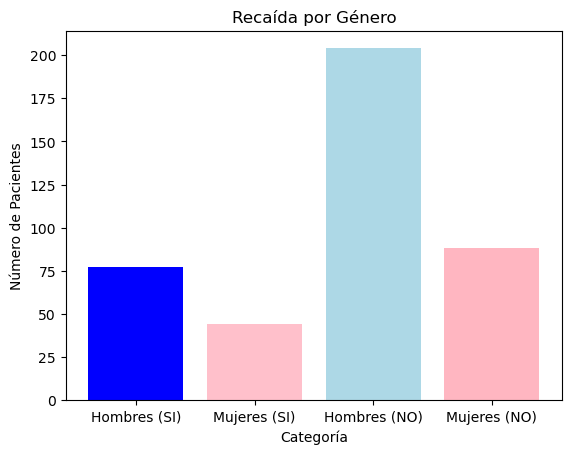

In [18]:
import matplotlib.pyplot as plt

def grafica_sexo_recaida(registros):
    hombres_si = mujeres_si = hombres_no = mujeres_no = 0
    
    for registro in registros:
        sexo, _, _, _, _, recaida = registro
        
        if sexo == 'HOMBRE' and recaida == 'SI':
            hombres_si += 1
        elif sexo == 'MUJER' and recaida == 'SI':
            mujeres_si += 1
        elif sexo == 'HOMBRE' and recaida == 'NO':
            hombres_no += 1
        elif sexo == 'MUJER' and recaida == 'NO':
            mujeres_no += 1
    
    # Datos para la gráfica
    categorias = ['Hombres (SI)', 'Mujeres (SI)', 'Hombres (NO)', 'Mujeres (NO)']
    valores = [hombres_si, mujeres_si, hombres_no, mujeres_no]
    
    plt.bar(categorias, valores, color=['blue', 'pink', 'lightblue', 'lightpink'])
    
    # Para añadir nombres y título
    plt.xlabel('Categoría')
    plt.ylabel('Número de Pacientes')
    plt.title('Recaída por Género')
    
    # Muestra la gráfica
    plt.show()


grafica_sexo_recaida(registros)